[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/royforestano/Deep_Learning_Symmetries/blob/main/Discovering_Sparse_Representations_of_Lie_Groups_with_Machine_Learning/sym_u_and_su_demo.ipynb)

# Discovering Sparse Representations of Lie Groups with Machine Learning - Demonstration

Author: Roy Forestano

Date of Completion: 18 February 2023

Connected to the paper on: Discovering Sparse Representations of Lie Groups with Machine Learning (arXiv:2302.05383: https://arxiv.org/abs/2302.05383)

This notebook will reproduce examples in the paper.

In [1]:
!pip install torch

In [35]:
from sym_u_and_su_utils import *
%matplotlib inline

Using cpu device


In [4]:
# Define oracles and useful definitions
def oracle_norm(data): # L^2 Norm (includes imaginary) on X: sqrt(sum(|x_i|^2))
    return torch.norm(torch.abs(data),dim=1)

def oracle_complex_norm(data): # L^2 Norm (includes imaginary) on X: sqrt(sum(|x_i|^2))
    return linalg.vector_norm(data,dim=1)

def G2(data):
    return (c_tensor*torch.einsum('ij,ik,il->ijkl',data[:n//3],data[n//3:2*n//3],data[2*n//3:])).sum(dim=[1,2,3])

---

For the Lorentz Groups with and without Sparsity: Figures 1-2: $n_{dim} = 4, n_{gen}=6$ and $n_{dim} = 4, n_{gen}=4$, see LO46.ipynb and LO44.ipynb

---

# $U(2)$ and $SU(2)$: Figure 3: $n_{dim} = 2, n_{gen} = 4,3$

## $U(2)$: $n_{dim} = 2, n_{gen} = 4$

Epoch 2000   |  Train Loss: 0.07845369534427625
Total Time: 52.56416368
Complete.


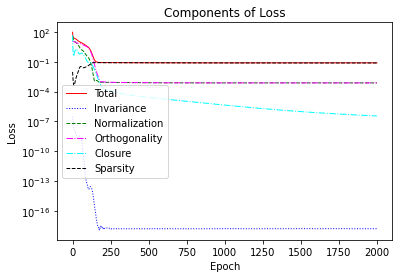

In [10]:
torch.manual_seed(0)
n       = 300   # sample size
n_dim   = 2     # dimension
n_gen   = 4     # N^2 for U(n) , N^2-1 for SU(n)
n_com   = int(n_gen*(n_gen-1)/2)  # N_g choose 2 of these
eps     = 1e-3
lr      = 5e-2
epochs  = 2000
oracle = oracle_complex_norm
include_sc = True

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

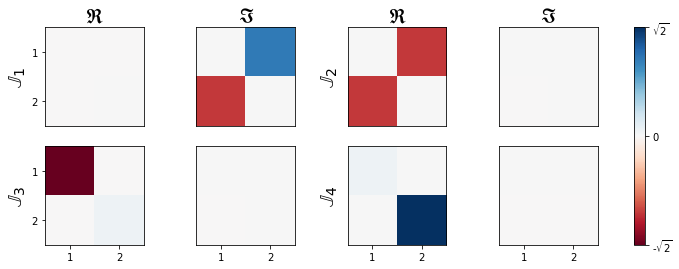

In [11]:
figsizeg = (13,4)
rows = 2
cols = 2*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

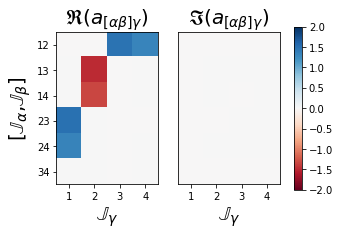

In [12]:
if n_gen>1 and include_sc:
    figsizec=(5,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [13]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-1.3759583e-03-0.00064242j -1.4712363e-03-0.00087014j
  1.4722540e+00-0.00017352j  1.3261917e+00-0.00023508j]
 
 C = 
  [[ 1.9888823e+00-1.9808056e+00j -2.0544599e-03+4.5473152e-04j]
 [-7.7917124e-04-2.2802735e-03j -1.9740659e+00+1.9809221e+00j]] 

The structure constants were NOT found successfully with a mean absolute error (MAE) of 1.402029037475586. 
 

13: 
 Structure Constants = [ 4.0415227e-03-0.00022081j -1.4849770e+00+0.00103474j
 -2.1942705e-04+0.0006841j   7.8715086e-03+0.00094818j]
 
 C = 
  [[-4.2783351e-05+1.6362633e-04j -1.4779730e+00+1.4707891e+00j]
 [-1.4775298e+00+1.4788262e+00j -1.0368242e-02-6.4921542e-04j]] 

The structure constants were NOT found successfully with a mean absolute error (MAE) of 1.0465282201766968. 
 

14: 
 Structure Constants = [ 3.9833449e-03-0.00468306j -1.3382521e+00+0.00230327j
 -1.3776148e-02-0.00026997j  4.1151047e-04+0.00238588j]
 
 C = 
  [[-1.8761612e-02+2.0224578e-04j -1.3364040e+00+1.3359052e+00j]
 [-1.3270

In [14]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.0471925735 rad, 59.9997148017 deg
Angle between generator 1 and 3: 0.7853975892 rad, 44.9999671013 deg
Angle between generator 1 and 4: 1.5709953308 rad, 90.0114020902 deg
Angle between generator 2 and 3: 0.7856361866 rad, 45.0136377249 deg
Angle between generator 2 and 4: 0.7856897712 rad, 45.0167078949 deg
Angle between generator 3 and 4: 1.5713261366 rad, 90.0303558651 deg


## $SU(2)$: $n_{dim} = 2, n_{gen} = 3$

Epoch 2000   |  Train Loss: 0.11719401295204446
Total Time: 32.61851907
Complete.


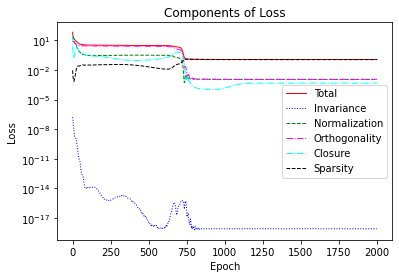

In [15]:
torch.manual_seed(0)
n       = 300
n_dim   = 2
n_gen   = 3
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 5e-2
epochs  = 2000
oracle = oracle_complex_norm
include_sc = True

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

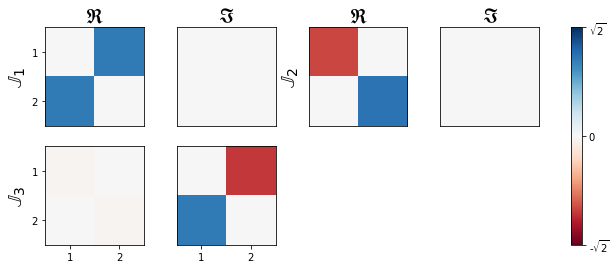

In [16]:
figsizeg = (13,4)
rows = 2
cols = 2*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

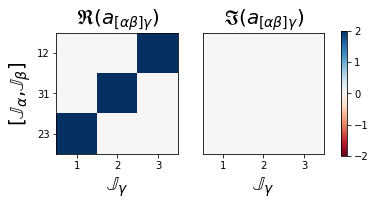

In [17]:
if n_gen>1 and include_sc:
    figsizec=(6,2.3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [18]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-6.8545341e-07-1.4901161e-08j  3.4435093e-04+2.9802322e-08j
  1.9866810e+00-1.1920929e-07j]
 
 C = 
  [[ 0.07345667-2.0635444e-04j  1.9782476 +1.9757761e+00j]
 [-1.9782469 -1.9757768e+00j  0.06610305+2.0634323e-04j]] 

The structure constants were NOT found successfully with a mean absolute error (MAE) of 1.4328488111495972. 
 

31: 
 Structure Constants = [1.8626451e-08-1.2223609e-09j 1.9863355e+00-0.0000000e+00j
 3.4434721e-04+7.4505806e-09j]
 
 C = 
  [[ 1.87621   -1.9792830e+00j -0.00334005+1.3609946e-04j]
 [ 0.00334087-1.3686165e-04j -2.0725894 +1.9792830e+00j]] 

The structure constants were NOT found successfully with a mean absolute error (MAE) of 1.3999428749084473. 
 

23: 
 Structure Constants = [ 1.9868991e+00-2.5607646e-05j  3.3993274e-04-1.1213124e-05j
 -4.3614572e-03-3.8996339e-05j]
 
 C = 
  [[ 1.6050684e-04-1.2406923e-05j -1.9771317e+00+1.9727584e+00j]
 [-1.9772085e+00+1.9814328e+00j -5.0133222e-04+1.0786922e-05j]] 

The structure constants

In [19]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 2.3561944962 rad, 135.0000003416 deg
Angle between generator 1 and 3: 2.0948820114 rad, 120.0278978319 deg
Angle between generator 2 and 3: 0.7846064568 rad, 44.9546385509 deg


---

# $U(3)$ and $SU(3)$: Figure 4: $n_{dim} = 3, n_{gen} = 9,8$

## $U(3)$: $n_{dim} = 3, n_{gen} = 9$

Epoch 5000   |  Train Loss: 0.23598873930871317
Total Time: 682.58817792
Complete.


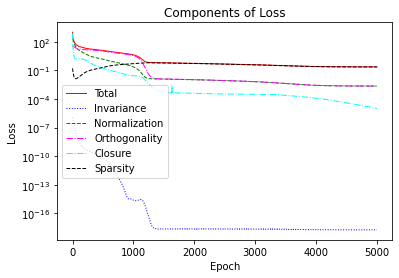

In [20]:
torch.manual_seed(0)
n       = 300
n_dim   = 3
n_gen   = 9
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-2
epochs  = 5000
oracle = oracle_complex_norm
include_sc = True

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc )

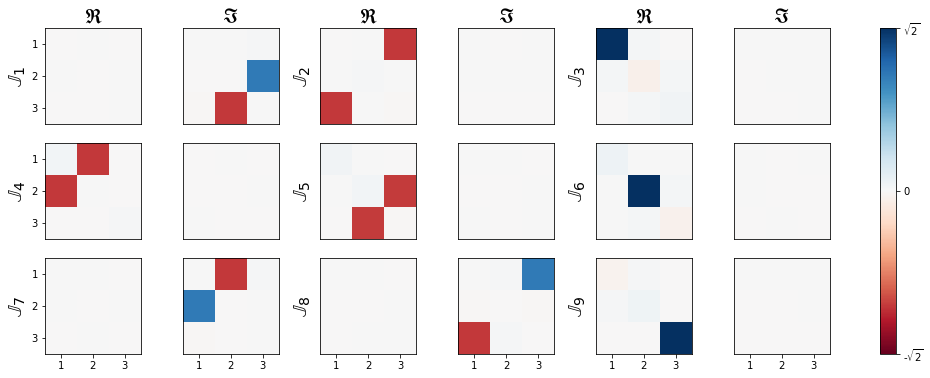

In [21]:
figsizeg = (18,6)
rows = 3
cols = 3*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred=gens_pred, rows=rows, cols=cols)

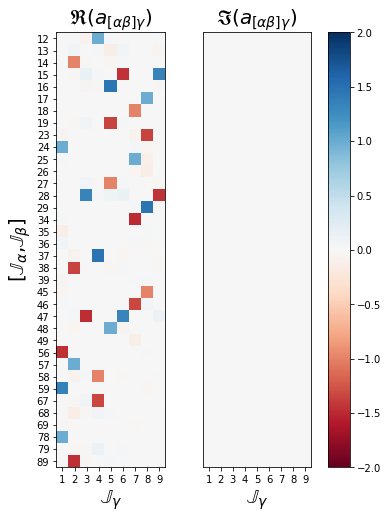

In [22]:
if n_gen>1 and include_sc:
    figsizec=(6,8)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [23]:
if n_gen>1 and include_sc and False:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [24]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.5685484409 rad, 89.8712056273 deg
Angle between generator 1 and 3: 0.8107182980 rad, 46.4507368470 deg
Angle between generator 1 and 4: 1.5734100342 rad, 90.1497544020 deg
Angle between generator 1 and 5: 1.0398373604 rad, 59.5782921299 deg
Angle between generator 1 and 6: 0.7877084613 rad, 45.1323703184 deg
Angle between generator 1 and 7: 0.7854576707 rad, 45.0034095166 deg
Angle between generator 1 and 8: 1.0473476648 rad, 60.0086008778 deg
Angle between generator 1 and 9: 0.7854295373 rad, 45.0017975920 deg
Angle between generator 2 and 3: 1.3407636881 rad, 76.8201006518 deg
Angle between generator 2 and 4: 0.7758784294 rad, 44.4545594206 deg
Angle between generator 2 and 5: 0.7950565815 rad, 45.5533865939 deg
Angle between generator 2 and 6: 1.5867593288 rad, 90.9146126457 deg
Angle between generator 2 and 7: 1.5564202070 rad, 89.1763090113 deg
Angle between generator 2 and 8: 1.5606994629 rad, 89.4214923120 deg
Angle between generator 2 and 9: 1

## $SU(3)$: $n_{dim} = 3, n_{gen} = 8$

Epoch 6000   |  Train Loss: 0.30547967253571687
Total Time: 627.68820715
Complete.


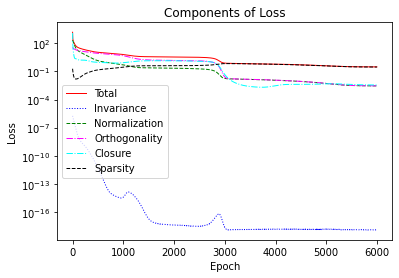

In [25]:
torch.manual_seed(0)
n       = 300
n_dim   = 3
n_gen   = 8
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-2
epochs  = 6000
oracle = oracle_complex_norm
include_sc = True

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

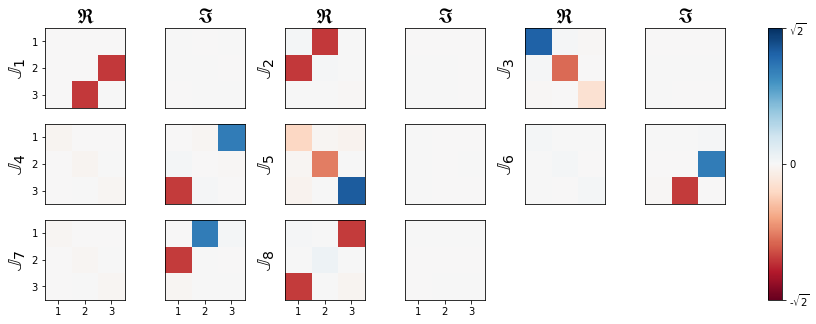

In [26]:
figsizeg = (18,5)
rows = 3
cols = 3*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)
plt.savefig('SU3.png',bbox_inches='tight')

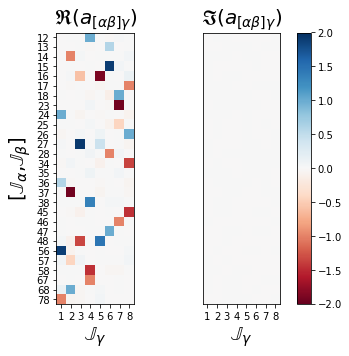

In [27]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)
    plt.savefig('SU3_sc.png',bbox_inches='tight')

In [28]:
if n_gen>1 and include_sc and False:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [29]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 1.0507261753 rad, 60.2021752691 deg
Angle between generator 1 and 3: 0.7797792554 rad, 44.6780602857 deg
Angle between generator 1 and 4: 1.0634114742 rad, 60.9289893590 deg
Angle between generator 1 and 5: 0.7854788303 rad, 45.0046218752 deg
Angle between generator 1 and 6: 1.0450845957 rad, 59.8789365666 deg
Angle between generator 1 and 7: 0.8138180375 rad, 46.6283388409 deg
Angle between generator 1 and 8: 2.0791871548 rad, 119.1286487861 deg
Angle between generator 2 and 3: 0.7821991444 rad, 44.8167097108 deg
Angle between generator 2 and 4: 1.5790374279 rad, 90.4721803120 deg
Angle between generator 2 and 5: 1.5386555195 rad, 88.1584673910 deg
Angle between generator 2 and 6: 1.0567934513 rad, 60.5498045771 deg
Angle between generator 2 and 7: 1.5826288462 rad, 90.6779534211 deg
Angle between generator 2 and 8: 2.1102938652 rad, 120.9109320085 deg
Angle between generator 3 and 4: 1.5864412785 rad, 90.8963897010 deg
Angle between generator 3 and 5:

---

# $U(4)$ and $SU(4)$: Figure 5: $n_{dim} = 4, n_{gen} = 16,15$

## $U(4)$: $n_{dim} = 4, n_{gen} = 16$

Epoch 8000   |  Train Loss: 0.47163534580678165
Total Time: 2482.70064402
Complete.


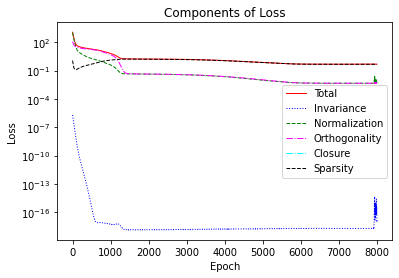

In [30]:
torch.manual_seed(0)
n       = 300
n_dim   = 4
n_gen   = 16
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 5e-3
epochs  = 8000
oracle  = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

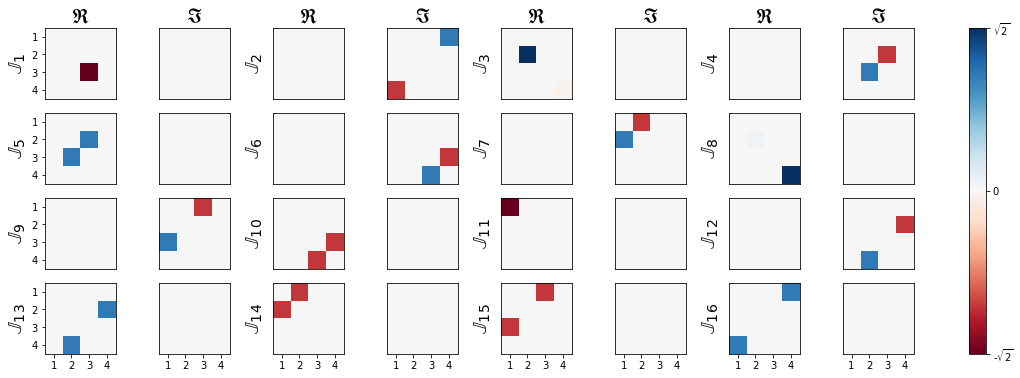

In [31]:
figsizeg = (20,6)
rows = 4
cols = 4*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [32]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [33]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [34]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

## $SU(4)$: $n_{dim} = 4, n_{gen} = 15$

Epoch 10000   |  Train Loss: 0.4341161242653714
Total Time: 2932.32044601
Complete.


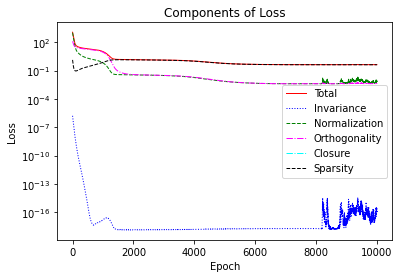

In [38]:
torch.manual_seed(1)
n       = 300
n_dim   = 4
n_gen   = 15
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 5e-3
epochs  = 10000
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

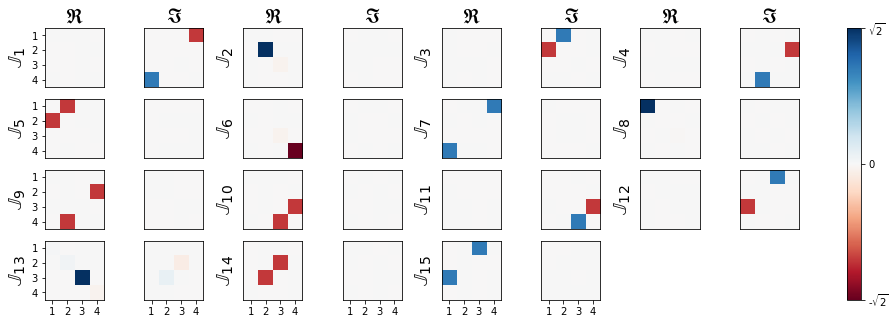

In [39]:
figsizeg = (20,5)
rows = 4
cols = 4*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [40]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [41]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [42]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

---

# $U(5)$ and $SU(5)$: Figure 6: $n_{dim} = 5, n_{gen} = 25,24$

## $U(5)$: $n_{dim} = 5, n_{gen} = 25$

Epoch 15000   |  Train Loss: 0.7852405316607246
Total Time: 11819.78935218
Complete.


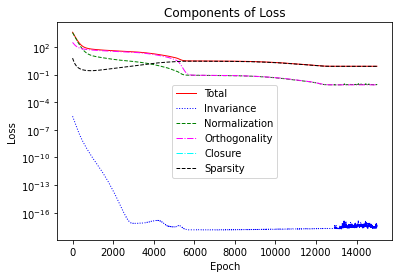

In [55]:
torch.manual_seed(0)
n       = 300
n_dim   = 5
n_gen   = 25
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 15000
oracle  = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

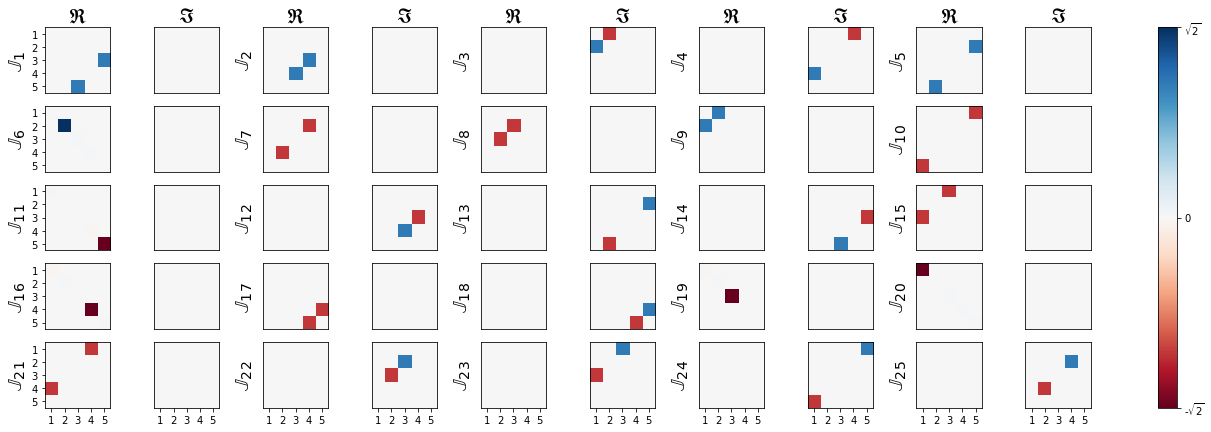

In [56]:
figsizeg = (24,7)
rows = 5
cols = 5*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [57]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [58]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [59]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

## $SU(5)$: $n_{dim} = 5, n_{gen} = 24$

Epoch 15000   |  Train Loss: 0.7214374076339474
Total Time: 10473.49228907
Complete.


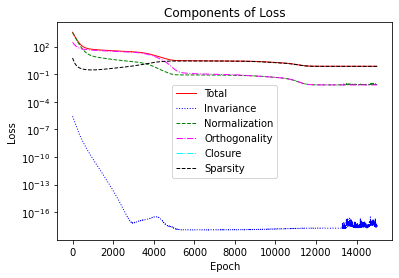

In [60]:
torch.manual_seed(0)
n       = 300
n_dim   = 5
n_gen   = 24
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 15000
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

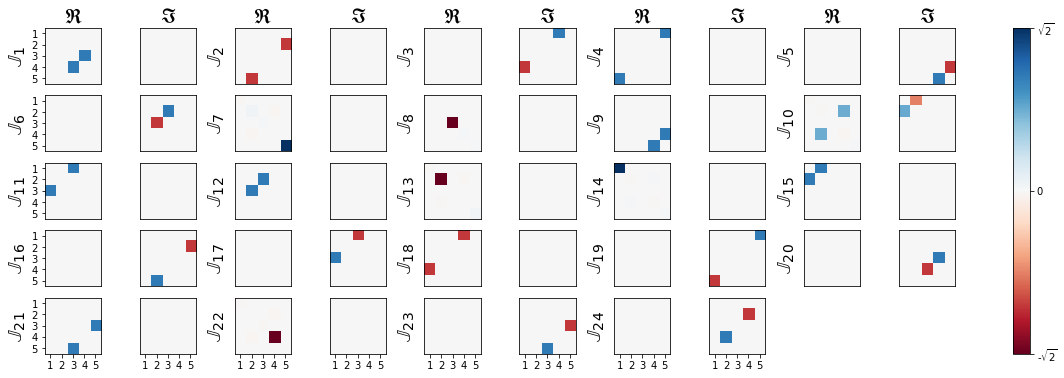

In [61]:
figsizeg =(24,6)
rows = 5
cols = 5*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [62]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [63]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [64]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

---

# $U(6)$ and $SU(6)$: Figure 6: $n_{dim} = 6, n_{gen} = 36,35$

## $U(6)$: $n_{dim} = 6, n_{gen} = 36$

Epoch 20000   |  Train Loss: 1.1791017262872397
Total Time: 39331.93704200
Complete.


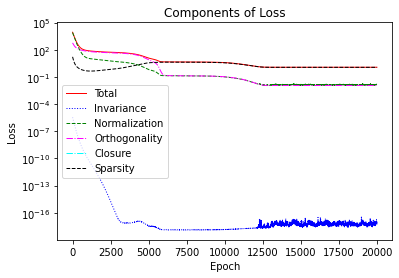

In [65]:
torch.manual_seed(0)
n       = 300
n_dim   = 6
n_gen   = 36
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 20000
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

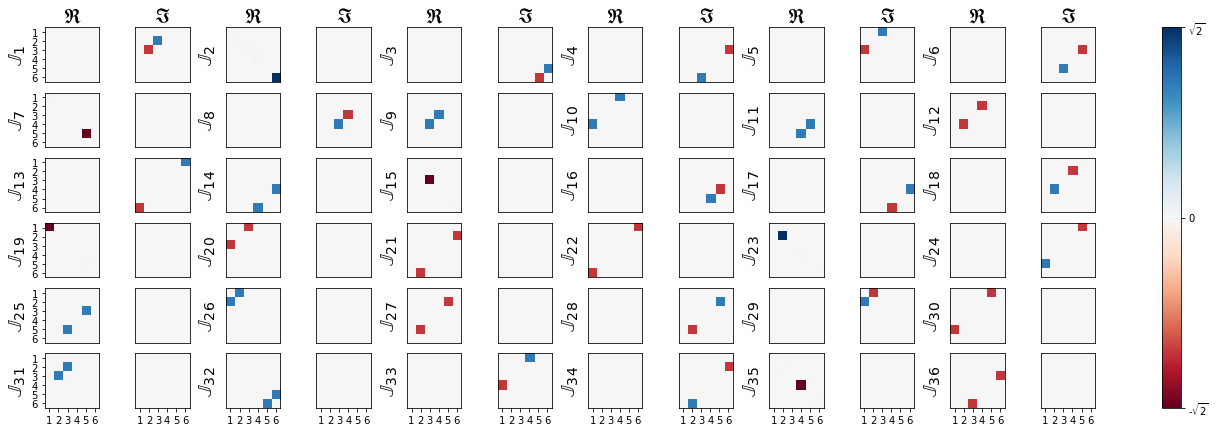

In [66]:
figsizeg = (24,7)
rows = 6
cols = 6*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [67]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [68]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [69]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)

## $SU(6)$: $n_{dim} = 6, n_{gen} = 35$

Epoch 20000   |  Train Loss: 1.1155922999143588
Total Time: 39502.11466217
Complete.


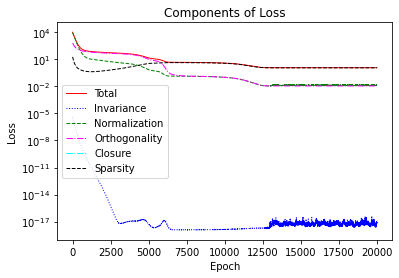

In [5]:
torch.manual_seed(0)
n       = 300
n_dim   = 6
n_gen   = 35
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 20000
oracle = oracle_complex_norm
include_sc = False

gens_pred, struc_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

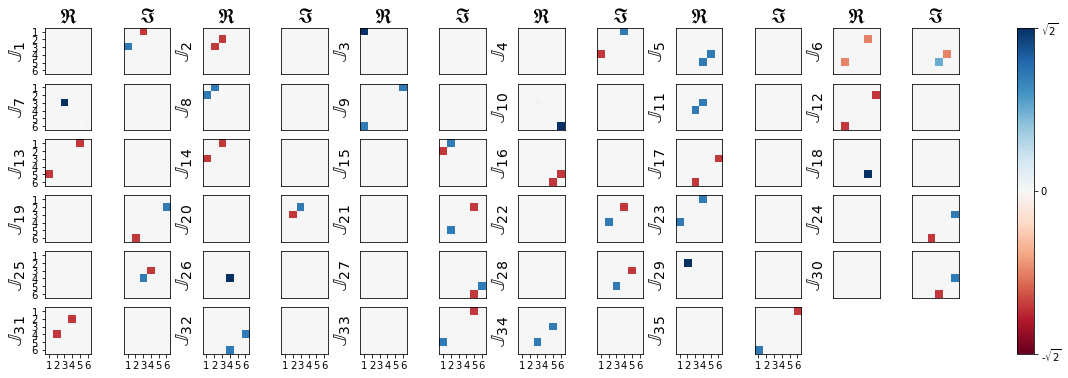

In [6]:
figsizeg = (24,6)
rows = 6
cols = 6*2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

In [7]:
if n_gen>1 and include_sc:
    figsizec=(6,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [8]:
if n_gen>1 and include_sc:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

In [9]:
if n_gen>1 and False:
    verify_orthogonality(gens_pred=gens_pred)